<a href="https://colab.research.google.com/github/MateenMalik22/MateenMalik22/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Lets check the column names presemt in the dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# **Data Understanding**
* Loan_ID : Unique Loan ID
* Gender : Male/Female
* Married : Applicant married
* Dependents : Number of dependents
* Education : Applicant Education
* Self_Employed : Whether the applicant is self employed or not!
* ApplicantIncome : Applicant income
* CopplicantIncome : Coapplicant income
* LoanAmount : Loan amount in thousands
* Loan_Amount_Term : Term of loan in months
* Credit_History : Credit history meets guidelines
* Property_Area : Urban/Semi Urban/Rural
* Loan_Status : Loan approved **target variable**

In [ ]:
data['Loan_ID'].nunique()

614

In [ ]:
data.drop(columns=['Loan_ID'],inplace=True)

In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [ ]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [ ]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [ ]:
data['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [ ]:
data['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [ ]:
data['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [ ]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [ ]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
data['Credit_History'] = data['Credit_History'].replace({1:'good',0:'bad'})

In [ ]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [ ]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [ ]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [ ]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

##**Figuring out the Type of Data**

In [ ]:
continuous = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
discrete_categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
discrete_count = ['Dependents','Loan_Amount_Term']

##**Exploratory Data Analysis on Continuous Variables**

In [ ]:
data[continuous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


##**Univariate Analysis on Numerical Columns**

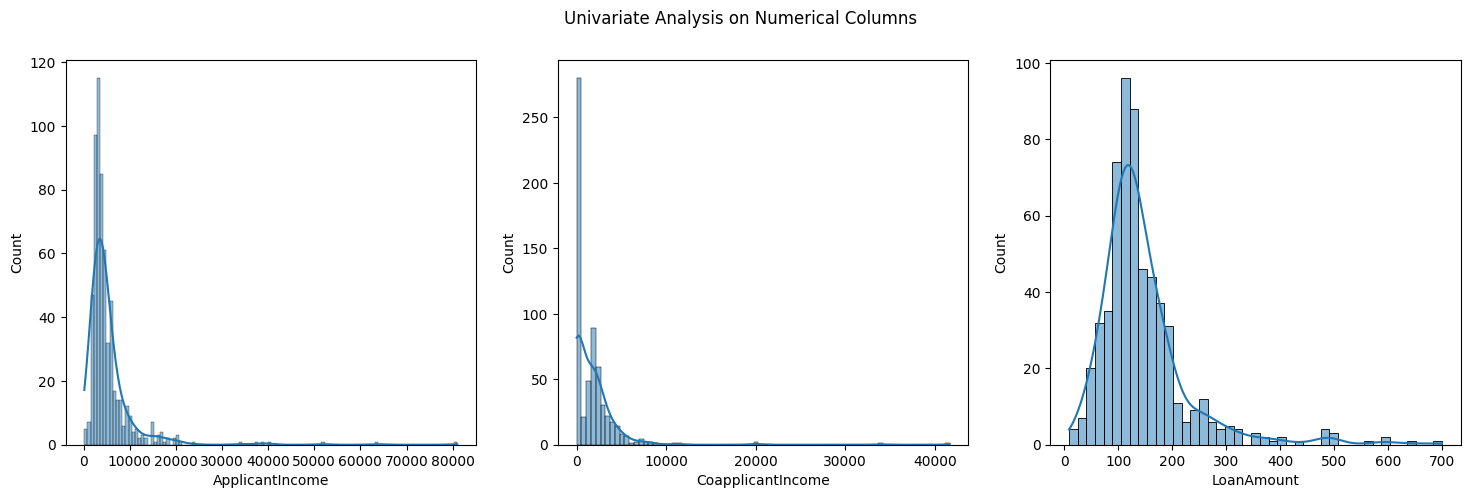

In [ ]:
plt.rcParams['figure.figsize'] = (18,5)
plt.subplot(1,3,1)
sns.histplot(data['ApplicantIncome'],kde=True)
plt.subplot(1,3,2)
sns.histplot(data['CoapplicantIncome'],kde=True)
plt.subplot(1,3,3)
sns.histplot(data['LoanAmount'],kde=True)
plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [ ]:
data[continuous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

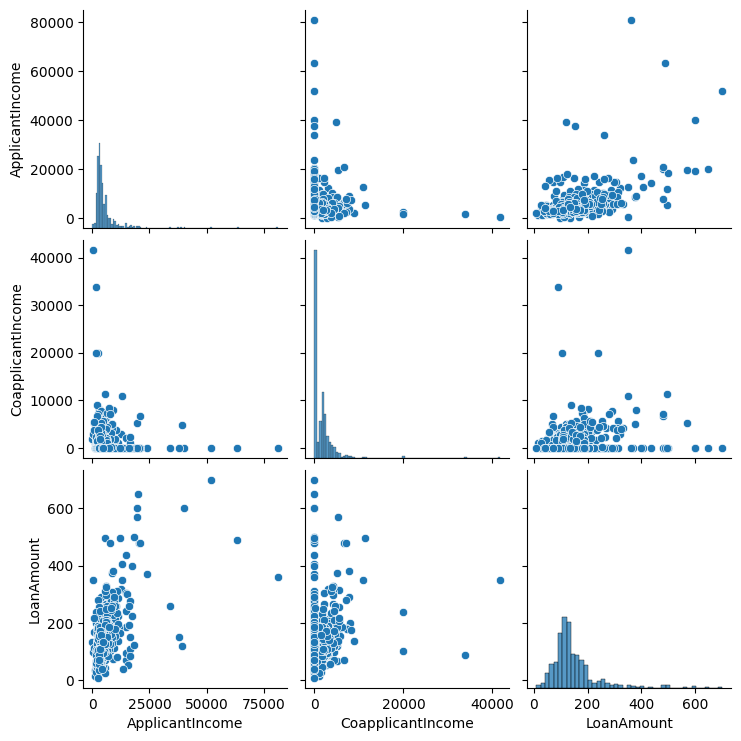

In [ ]:
sns.pairplot(data[continuous])
plt.show()

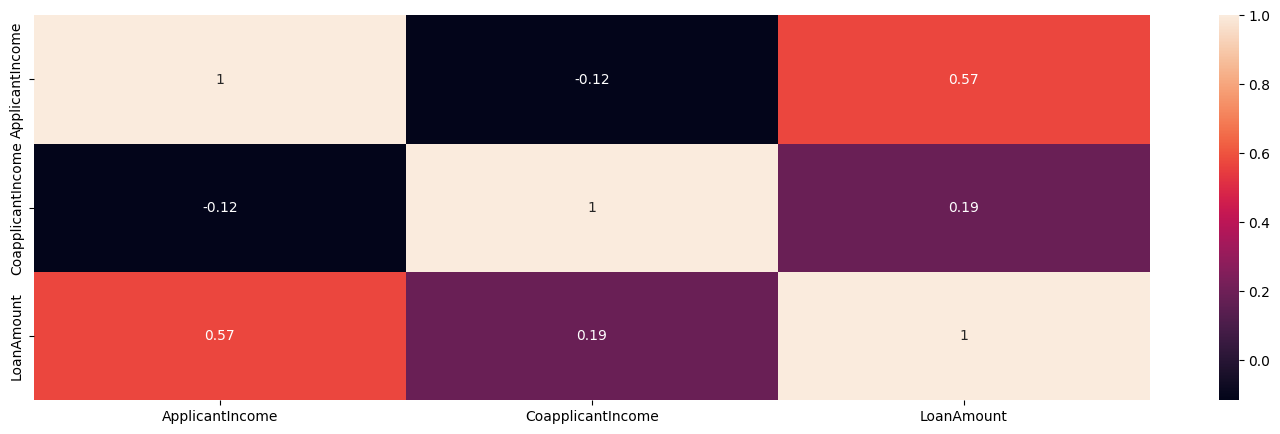

In [ ]:
sns.heatmap(data[continuous].corr(),annot=True)
plt.show()

##**Visualizing outliers using Boxplot**

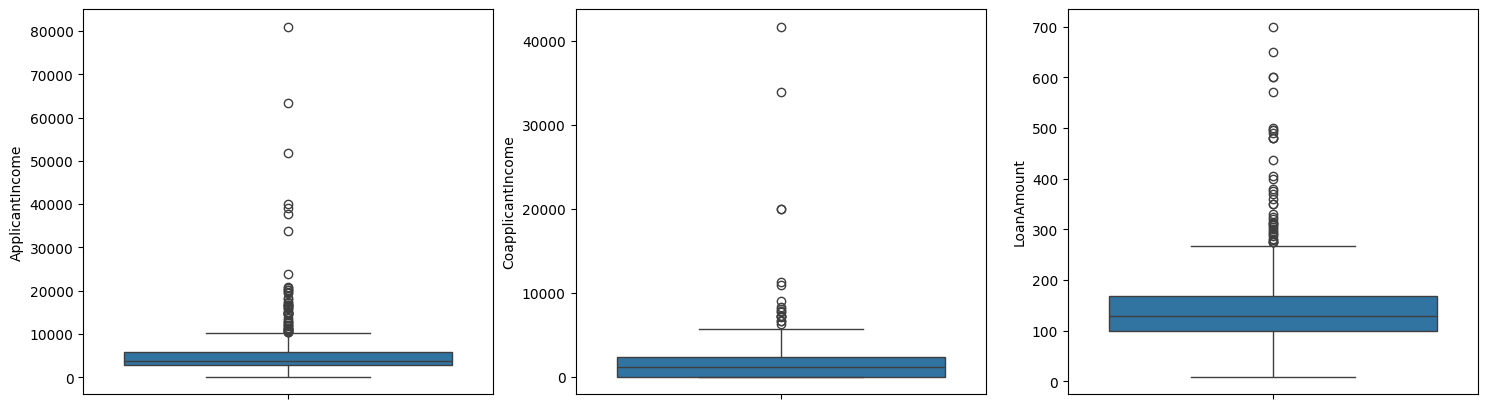

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])
plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])
plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])
plt.show()

##**Exploratory Data Analysis on Discrete Variables**

In [ ]:
data[discrete_categorical].describe(include='object')

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


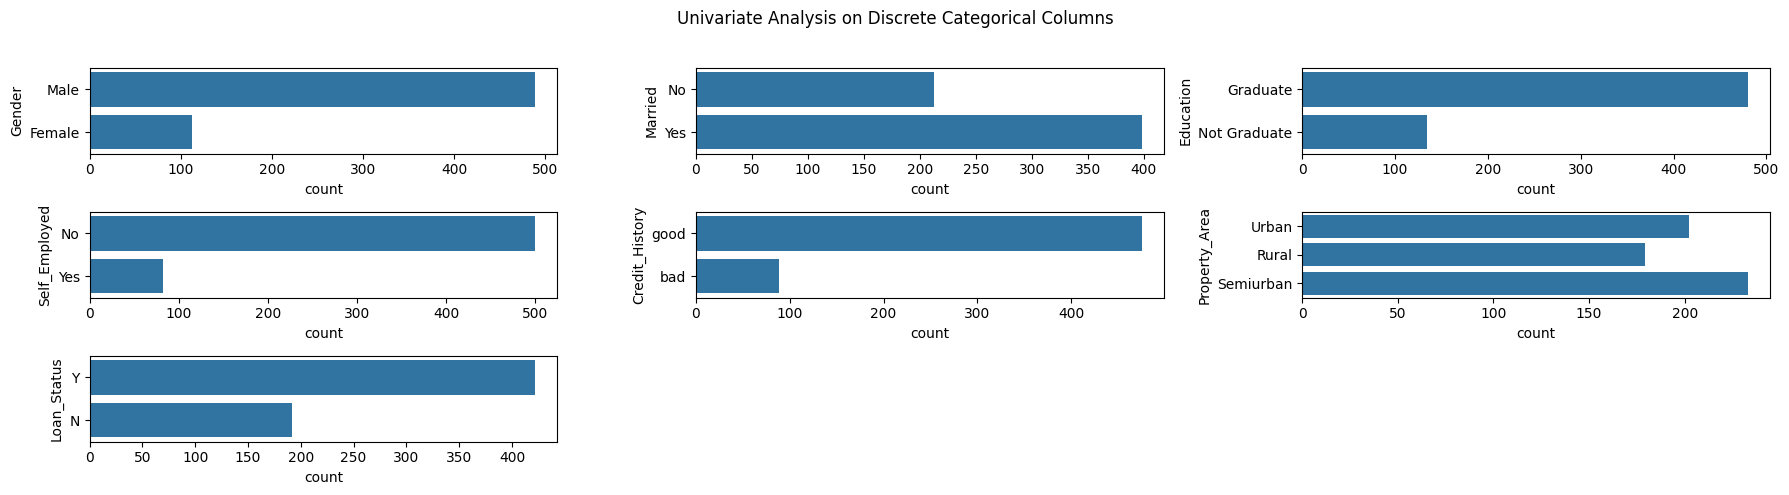

In [ ]:
plt.rcParams['figure.figsize'] = (18,5)
plt.subplot(3, 3, 1)
sns.countplot(data['Gender'])
plt.subplot(3, 3, 2)
sns.countplot(data['Married'])
plt.subplot(3, 3, 3)
sns.countplot(data['Education'])
plt.subplot(3, 3, 4)
sns.countplot(data['Self_Employed'])
plt.subplot(3, 3, 5)
sns.countplot(data['Credit_History'])
plt.subplot(3, 3, 6)
sns.countplot(data['Property_Area'])
plt.subplot(3, 3, 7)
sns.countplot(data['Loan_Status'])
plt.suptitle('Univariate Analysis on Discrete Categorical Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
data[discrete_count].describe(include='all')

,Dependents,Loan_Amount_Term
count,599,600.00000
unique,4,NaN
top,0,NaN
freq,345,NaN
mean,NaN,342.00000
std,NaN,65.12041
min,NaN,12.00000
25%,NaN,360.00000
50%,NaN,360.00000
75%,NaN,360.00000


##**Data Preparation**

In [ ]:
data["Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

In [ ]:
# Reorder the columns to move 'Income' to the 6th position
cols = data.columns.tolist()
# Remove 'Income' from its current position and insert it at the 6th position (index 5)
cols.insert(5, cols.pop(cols.index('Income')))
# Reorder the DataFrame columns
data = data[cols]
data

,Gender,Married,Dependents,Education,Self_Employed,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,NaN,360.0,good,Urban,Y
1,Male,Yes,1,Graduate,No,6091.0,128.0,360.0,good,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,66.0,360.0,good,Urban,Y
3,Male,Yes,0,Not Graduate,No,4941.0,120.0,360.0,good,Urban,Y
4,Male,No,0,Graduate,No,6000.0,141.0,360.0,good,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,71.0,360.0,good,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,40.0,180.0,good,Rural,Y
611,Male,Yes,1,Graduate,No,8312.0,253.0,360.0,good,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,187.0,360.0,good,Urban,Y


In [ ]:
#Modifying the Wrong data
data['Dependents'] = data['Dependents'].replace({'3+':'3'})

##**Treating Missing Values**

In [ ]:
#Checking number of missing values
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
Income               0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#Checking percentage of missing values
data.isnull().sum()/len(data)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
Income              0.000000
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
dtype: float64

In [ ]:
#Dropping missing Values from important features as they cannot be replaced
data = data.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"])

In [ ]:
#Checking the data
data

,Gender,Married,Dependents,Education,Self_Employed,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,6091.0,128.0,360.0,good,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,66.0,360.0,good,Urban,Y
3,Male,Yes,0,Not Graduate,No,4941.0,120.0,360.0,good,Urban,Y
4,Male,No,0,Graduate,No,6000.0,141.0,360.0,good,Urban,Y
5,Male,Yes,2,Graduate,Yes,9613.0,267.0,360.0,good,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,71.0,360.0,good,Rural,Y
610,Male,Yes,3,Graduate,No,4106.0,40.0,180.0,good,Rural,Y
611,Male,Yes,1,Graduate,No,8312.0,253.0,360.0,good,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,187.0,360.0,good,Urban,Y


In [ ]:
#Count Variable replace with 0
data['Dependents'] = data['Dependents'].fillna(0)

In [ ]:
#Categorical variables replace with mode
data["Gender"] = data["Gender"].fillna(data['Gender'].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [ ]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Income              0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

##**Outliers Treatment-Encoding**

In [ ]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype(int)
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype(int)
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype(int)
data['Credit_History'] = data['Credit_History'].map({'good':1,'bad':0}).astype(int)
data['Property_Area'] = data['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0}).astype(int)
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype(int)

##**Typecasting**

In [ ]:
data['Dependents'] = data['Dependents'].astype(int)
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype(int)

In [ ]:
#Checking the data
data

,Gender,Married,Dependents,Education,Self_Employed,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,6091.0,128.0,360,1,0,0
2,1,1,0,1,1,3000.0,66.0,360,1,2,1
3,1,1,0,0,0,4941.0,120.0,360,1,2,1
4,1,0,0,1,0,6000.0,141.0,360,1,2,1
5,1,1,2,1,1,9613.0,267.0,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900.0,71.0,360,1,0,1
610,1,1,3,1,0,4106.0,40.0,180,1,0,1
611,1,1,1,1,0,8312.0,253.0,360,1,2,1
612,1,1,2,1,0,7583.0,187.0,360,1,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 1 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            529 non-null    int64  
 1   Married           529 non-null    int64  
 2   Dependents        529 non-null    int64  
 3   Education         529 non-null    int64  
 4   Self_Employed     529 non-null    int64  
 5   Income            529 non-null    float64
 6   LoanAmount        529 non-null    float64
 7   Loan_Amount_Term  529 non-null    int64  
 8   Credit_History    529 non-null    int64  
 9   Property_Area     529 non-null    int64  
 10  Loan_Status       529 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 49.6 KB


##**Data Transformation**

In [ ]:
data[['Income','LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

##**Removing Skewness**

In [ ]:
#Log Transformation
data['Income'] = np.log(data['Income'])
data['LoanAmount'] = np.log(data['LoanAmount'])
data[['Income','LoanAmount']].skew()

Income        1.120869
LoanAmount   -0.296855
dtype: float64

In [ ]:
#Root Transformation
data["Income"] = np.sqrt(data["Income"])**(1/12)
data["LoanAmount"] = data["LoanAmount"]**(1/12)
data[['Income','LoanAmount']].skew()

Income        0.854473
LoanAmount   -1.148944
dtype: float64

In [ ]:
#Boxcox Transformation
from scipy.stats import boxcox
data['Income'],param = boxcox(data['Income'])
data['LoanAmount'],param= boxcox(data['LoanAmount'])
data[['Income','LoanAmount']].skew()

Income        0.000000
LoanAmount    0.125831
dtype: float64

In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,0.011401,0.592456,360,1,0,0
2,1,1,0,1,1,0.011400,0.458319,360,1,2,1
3,1,1,0,0,0,0.011401,0.578881,360,1,2,1
4,1,0,0,1,0,0.011401,0.613001,360,1,2,1
5,1,1,2,1,1,0.011402,0.754493,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,0.011400,0.472535,360,1,0,1
610,1,1,3,1,0,0.011400,0.364798,180,1,0,1
611,1,1,1,1,0,0.011402,0.742171,360,1,2,1
612,1,1,2,1,0,0.011402,0.674324,360,1,2,1


##**Loan Term Conversion**
* The column Loan_Amount_Term likely represents the term or duration of a loan in months.
* Dividing by 12 converts the term from months to years. This is because there are 12 months in a year.

In [ ]:
data["Loan_Amount_Term"] = data["Loan_Amount_Term"]/12

In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,0.011401,0.592456,30.0,1,0,0
2,1,1,0,1,1,0.011400,0.458319,30.0,1,2,1
3,1,1,0,0,0,0.011401,0.578881,30.0,1,2,1
4,1,0,0,1,0,0.011401,0.613001,30.0,1,2,1
5,1,1,2,1,1,0.011402,0.754493,30.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,0.011400,0.472535,30.0,1,0,1
610,1,1,3,1,0,0.011400,0.364798,15.0,1,0,1
611,1,1,1,1,0,0.011402,0.742171,30.0,1,2,1
612,1,1,2,1,0,0.011402,0.674324,30.0,1,2,1


##**Create x and y**

In [ ]:
x = data.drop("Loan_Status",axis=1)
y = data["Loan_Status"]

##**Identify the best random state number**

In [ ]:
#Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Initialize empty lists to store accuracy metrics
Train = []
Test = []
CV = []

#Iterate over a range of random_state values from 0 to 100
for i in range(0, 101): #Try from (0,10),(0,20),(0,30),....(0,101)
    #Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    #Initialize a logistic regression model
    log_default = LogisticRegression()

    #Fit the logistic regression model on the training data
    log_default.fit(x_train, y_train)

    #Predictions on training and testing data
    ypred_train = log_default.predict(x_train)
    ypred_test = log_default.predict(x_test)

    #Calculate and store accuracy scores for training and testing sets
    Train.append(accuracy_score(y_train, ypred_train))
    Test.append(accuracy_score(y_test, ypred_test))

    #Calculate cross-validation score and store the mean accuracy
    CV.append(cross_val_score(log_default, x_train, y_train, cv=5, scoring="accuracy").mean())

#Create a DataFrame to analyze the accuracy metrics
em = pd.DataFrame({"Train": Train, "Test": Test, "CV": CV})

#Filter the DataFrame to find the best random_state
gm = em[(abs(em["Train"] - em["Test"]) <= 0.05) & (abs(em["Test"] - em["CV"]) <= 0.05)]
rs = gm[gm["CV"] == gm["CV"].max()].index.to_list()[0]

#Print the best random_state number based on cross-validation accuracy
print("Best random_state number is:", rs)
gm

Best random_state number is: 70


,Train,Test,CV
0,0.817967,0.801887,0.815490
1,0.808511,0.839623,0.808487
2,0.808511,0.839623,0.808515
3,0.810875,0.830189,0.810952
5,0.808511,0.839623,0.808347
...,...,...,...
95,0.810875,0.830189,0.808375
96,0.822695,0.783019,0.822773
97,0.810875,0.830189,0.810812
98,0.817967,0.801887,0.818039


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=70)

##**Machine Learning Modelling and Evaluation**

##1. **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

ypred_train = log_model.predict(x_train)
ypred_test = log_model.predict(x_test)

#Train Accuracy
from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

#Cross validation Score
from sklearn.model_selection import cross_val_score
print("Cross Validation Score :",cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy").mean())

#Test Accuracy
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
Cross Validation Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


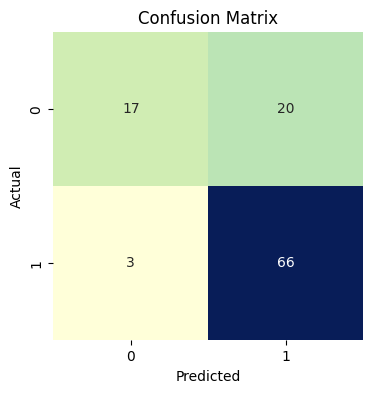

In [ ]:
#Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Assuming conf_matrix is already computed
conf_matrix = confusion_matrix(y_test, ypred_test)

#Plotting the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='d', cbar=False)

#Adding labels, title, and ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Classification Report for Test Set
from sklearn.metrics import classification_report
class_report = classification_report(y_test, ypred_test)
print("\nClassification Report of LR:")
print(class_report)


Classification Report of LR:
              precision    recall  f1-score   support

           0       0.85      0.46      0.60        37
           1       0.77      0.96      0.85        69

    accuracy                           0.78       106
   macro avg       0.81      0.71      0.72       106
weighted avg       0.80      0.78      0.76       106



In [ ]:
data


,Gender,Married,Dependents,Education,Self_Employed,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,0.011401,0.592456,30.0,1,0,0
2,1,1,0,1,1,0.011400,0.458319,30.0,1,2,1
3,1,1,0,0,0,0.011401,0.578881,30.0,1,2,1
4,1,0,0,1,0,0.011401,0.613001,30.0,1,2,1
5,1,1,2,1,1,0.011402,0.754493,30.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,0.011400,0.472535,30.0,1,0,1
610,1,1,3,1,0,0.011400,0.364798,15.0,1,0,1
611,1,1,1,1,0,0.011402,0.742171,30.0,1,2,1
612,1,1,2,1,0,0.011402,0.674324,30.0,1,2,1


In [ ]:
#Prepare a new input data point
new_input = pd.DataFrame({
    'Gender': [1],
    'Married': [1],
    'Dependents': [0],
    'Education': [1],
    'Self_Employed': [0],
    'Income': [500000],
    'LoanAmount': [1000000],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': [2]
})

#Predict the loan status for the new input data point
prediction = log_model.predict(new_input)

#Print the predicted loan status
if prediction[0] == 1:
    print("The Loan is Approved.")
else:
    print("The Loan is Rejected.")

The Loan is Rejected.


##2. **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

param_grid = {"n_neighbors":list(range(1,100))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
knn_grid.fit(x_train,y_train)

knn_model = knn_grid.best_estimator_

ypred_train = knn_model.predict(x_train)
ypred_knn = knn_model.predict(x_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_knn))

Train Accuracy : 0.7683215130023641
Cross Validation Score : 0.7470028011204481
Test Accuracy : 0.7264150943396226


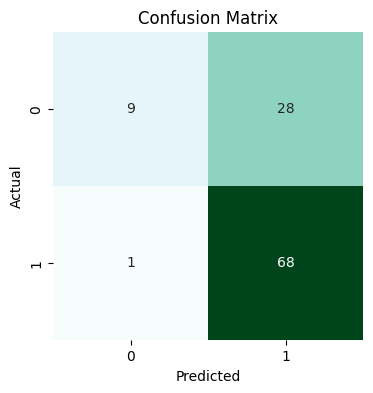

In [ ]:
#Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Assuming conf_matrix is already computed
conf_matrix1 = confusion_matrix(y_test, ypred_knn)

#Plotting the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix1, annot=True, cmap='BuGn', fmt='d', cbar=False)

#Adding labels, title, and ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Classification Report for Test Set
from sklearn.metrics import classification_report
class_report1 = classification_report(y_test, ypred_knn)
print("\nClassification Report of KNN:")
print(class_report1)


Classification Report of KNN:
              precision    recall  f1-score   support

           0       0.90      0.24      0.38        37
           1       0.71      0.99      0.82        69

    accuracy                           0.73       106
   macro avg       0.80      0.61      0.60       106
weighted avg       0.78      0.73      0.67       106



##3. **SVM**

In [ ]:
'''from sklearn.svm import SVC
estimator = SVC()
param_grid = {"C":[0.01,0.1,1,10,100],"kernel":["linear","rbf","sigmoid","poly"]} # {"C":list(range(0,100))}

from sklearn.model_selection import GridSearchCV
svm_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(x_train,y_train)

svm_model = svm_grid.best_estimator_

ypred_train = svm_model.predict(x_train)
ypred_test = svm_model.predict(x_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(svm_model,x_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))'''
#Output : Train Accuracy : 0.8226950354609929, Cross Validation Score : 0.8227731092436976, Test Accuracy : 0.7830188679245284


'from sklearn.svm import SVC\nestimator = SVC()\nparam_grid = {"C":[0.01,0.1,1,10,100],"kernel":["linear","rbf","sigmoid","poly"]} # {"C":list(range(0,100))}\n\nfrom sklearn.model_selection import GridSearchCV\nsvm_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)\nsvm_grid.fit(x_train,y_train)\n\nsvm_model = svm_grid.best_estimator_\n\nypred_train = svm_model.predict(x_train)\nypred_test = svm_model.predict(x_test)\n\nprint("Train Accuracy :",accuracy_score(y_train,ypred_train))\nprint("Cross Validation Score :",cross_val_score(svm_model,x_train,y_train,cv=5,scoring="accuracy").mean())\nprint("Test Accuracy :",accuracy_score(y_test,ypred_test))'

##4. **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=rs)
param_grid = {"criterion":["gini","entropy"],"max_depth":list(range(1,16))} # "max_depth":list(range(0,100))

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(x_train,y_train)

# Identifying the best model
dt = dt_grid.best_estimator_

# Identify the importance of each features
dt_fi = dt.feature_importances_

# Identifying the Features where the feature importance is greater than 0
index = [i for i,z in enumerate(dt_fi)if z>0]

# Create new dataset with important features
x_train_dt = x_train.iloc[:,index]
x_test_dt = x_test.iloc[:,index]

# Train with best model & with important features
dt.fit(x_train_dt,y_train)

ypred_train = dt.predict(x_train_dt)
ypred_dt = dt.predict(x_test_dt)

# Evaluate the best model
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(dt,x_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_dt))

Train Accuracy : 0.8226950354609929
Cross Validation Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


In [ ]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=70)

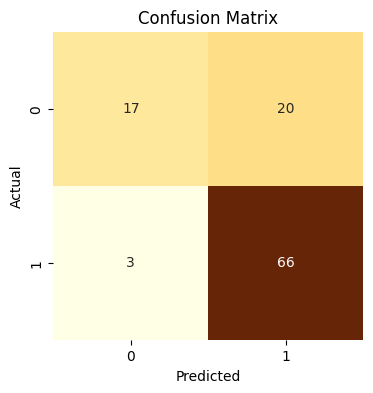

In [ ]:
#Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Assuming conf_matrix is already computed
conf_matrix2 = confusion_matrix(y_test, ypred_dt)

#Plotting the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix2, annot=True, cmap='YlOrBr', fmt='d', cbar=False)

#Adding labels, title, and ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Classification Report for Test Set
from sklearn.metrics import classification_report
class_report2 = classification_report(y_test, ypred_dt)
print("\nClassification Report of DT:")
print(class_report2)


Classification Report of DT:
              precision    recall  f1-score   support

           0       0.85      0.46      0.60        37
           1       0.77      0.96      0.85        69

    accuracy                           0.78       106
   macro avg       0.81      0.71      0.72       106
weighted avg       0.80      0.78      0.76       106



##5. **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=rs)
param_grid = {"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(x_train,y_train)

rf = rf_grid.best_estimator_
rf_fi = rf.feature_importances_

index = [i for i,z in enumerate(rf_fi) if z>0]

x_train_rf = x_train.iloc[:,index]
x_test_rf = x_test.iloc[:,index]

rf.fit(x_train_rf,y_train)

ypred_train = rf.predict(x_train_rf)
ypred_rf = rf.predict(x_test_rf)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_rf))

Train Accuracy : 0.9976359338061466
Cross Validation Score : 0.8062184873949579
Test Accuracy : 0.7830188679245284


In [ ]:
new_input_rf = pd.DataFrame({
    'Gender': [1],
    'Married': [1],
    'Dependents': [0],
    'Education': [1],
    'Self_Employed': [0],
    'Income': [500000],
    'LoanAmount': [1000000],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': [2]
})
prediction_rf = rf.predict(new_input_rf)

if prediction_rf[0] == 1:
    print("The Loan is Approved.")
else:
    print("The Loan is Rejected.")


The Loan is Rejected.


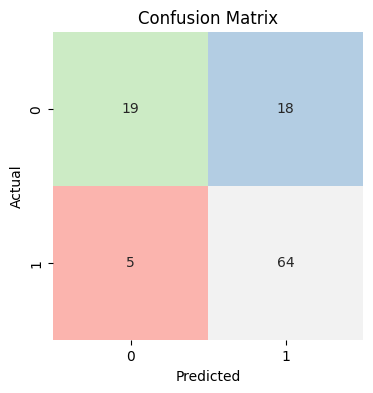

In [ ]:
#Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Assuming conf_matrix is already computed
conf_matrix3 = confusion_matrix(y_test, ypred_rf)

#Plotting the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix3, annot=True, cmap='Pastel1', fmt='d', cbar=False)

#Adding labels, title, and ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Classification Report for Test Set
from sklearn.metrics import classification_report
class_report3 = classification_report(y_test, ypred_rf)
print("\nClassification Report of RF:")
print(class_report3)


Classification Report of RF:
              precision    recall  f1-score   support

           0       0.79      0.51      0.62        37
           1       0.78      0.93      0.85        69

    accuracy                           0.78       106
   macro avg       0.79      0.72      0.74       106
weighted avg       0.78      0.78      0.77       106



##6. **AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=rs)
param_grid = {"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(x_train,y_train)

ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

index = [i for i,z in enumerate(ab_fi) if z>0]

x_train_ab = x_train.iloc[:,index]
x_test_ab = x_test.iloc[:,index]

ab.fit(x_train_ab,y_train)

ypred_train = ab.predict(x_train_ab)
ypred_ab = ab.predict(x_test_ab)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(ab,x_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_ab))

Train Accuracy : 0.8463356973995272
Cross Validation Score : 0.8204481792717087
Test Accuracy : 0.7547169811320755


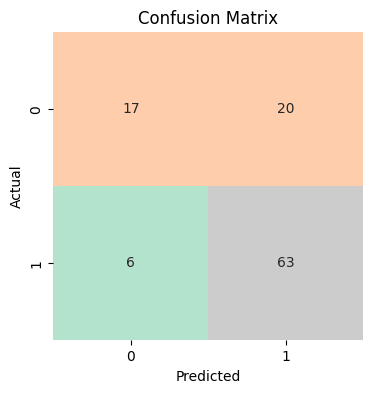

In [ ]:
#Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Assuming conf_matrix is already computed
conf_matrix4 = confusion_matrix(y_test, ypred_ab)

#Plotting the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix4, annot=True, cmap='Pastel2', fmt='d', cbar=False)

#Adding labels, title, and ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Classification Report for Test Set
from sklearn.metrics import classification_report
class_report4 = classification_report(y_test, ypred_ab)
print("\nClassification Report AB:")
print(class_report4)


Classification Report AB:
              precision    recall  f1-score   support

           0       0.74      0.46      0.57        37
           1       0.76      0.91      0.83        69

    accuracy                           0.75       106
   macro avg       0.75      0.69      0.70       106
weighted avg       0.75      0.75      0.74       106



##7. **Gradient Boost Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=rs)
param_grid = {"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(x_train,y_train)

gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

index = [i for i,z in enumerate(gb_fi) if z>0]

x_train_gb = x_train.iloc[:,index]
x_test_gb = x_test.iloc[:,index]

gb.fit(x_train_gb,y_train)

ypred_train = gb.predict(x_train_gb)
ypred_gb = gb.predict(x_test_gb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(gb,x_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_gb))

Train Accuracy : 0.8321513002364066
Cross Validation Score : 0.8180112044817927
Test Accuracy : 0.7735849056603774


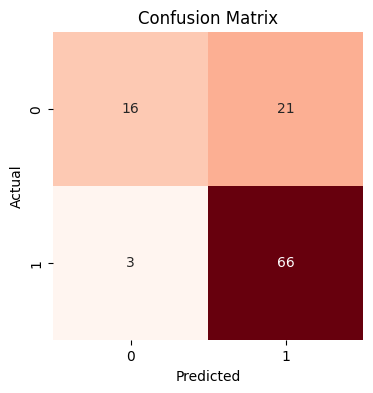

In [ ]:
#Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Assuming conf_matrix is already computed
conf_matrix5 = confusion_matrix(y_test, ypred_gb)

#Plotting the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix5, annot=True, cmap='Reds', fmt='d', cbar=False)

#Adding labels, title, and ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Classification Report for Test Set
from sklearn.metrics import classification_report
class_report5 = classification_report(y_test, ypred_gb)
print("\nClassification Report GB:")
print(class_report5)


Classification Report GB:
              precision    recall  f1-score   support

           0       0.84      0.43      0.57        37
           1       0.76      0.96      0.85        69

    accuracy                           0.77       106
   macro avg       0.80      0.69      0.71       106
weighted avg       0.79      0.77      0.75       106



##8. **XGBoost Classifer**

In [ ]:
from xgboost import XGBClassifier
estimator = XGBClassifier(random_state=rs)
param_grid = {"n_estimators":[10,20,40,100],"max_depth":[3,4,5],"gamma":[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(x_train,y_train)

xgb = xgb_grid.best_estimator_

xgb_fi = xgb.feature_importances_

index = [i for i,z in enumerate(xgb_fi) if z>0]

x_train_xgb = x_train.iloc[:,index]
x_test_xgb = x_test.iloc[:,index]

xgb.fit(x_train_xgb,y_train)

ypred_train = xgb.predict(x_train_xgb)
ypred_xg = xgb.predict(x_test_xgb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(xgb,x_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_xg))

Train Accuracy : 0.8557919621749409
Cross Validation Score : 0.8227450980392156
Test Accuracy : 0.7735849056603774


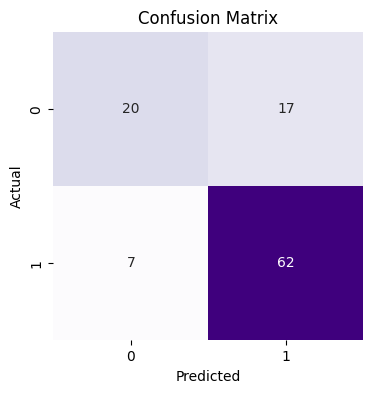

In [ ]:
#Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Assuming conf_matrix is already computed
conf_matrix6 = confusion_matrix(y_test, ypred_xg)

#Plotting the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix6, annot=True, cmap='Purples', fmt='d', cbar=False)

#Adding labels, title, and ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Classification Report for Test Set
from sklearn.metrics import classification_report
class_report5 = classification_report(y_test, ypred_xg)
print("\nClassification Report GB:")
print(class_report5)


Classification Report GB:
              precision    recall  f1-score   support

           0       0.74      0.54      0.62        37
           1       0.78      0.90      0.84        69

    accuracy                           0.77       106
   macro avg       0.76      0.72      0.73       106
weighted avg       0.77      0.77      0.76       106



## 9. **ANN**

Epoch 1/100
14/14 [==============================] - 1s 17ms/step - loss: 0.6340 - accuracy: 0.7069 - val_loss: 0.5965 - val_accuracy: 0.7075
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5403 - accuracy: 0.7754 - val_loss: 0.5427 - val_accuracy: 0.7736
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4892 - accuracy: 0.8227 - val_loss: 0.5145 - val_accuracy: 0.7830
Epoch 4/100
14/14 [==============================] - 0s 25ms/step - loss: 0.4649 - accuracy: 0.8227 - val_loss: 0.5134 - val_accuracy: 0.7830
Epoch 5/100
14/14 [==============================] - 0s 18ms/step - loss: 0.4448 - accuracy: 0.8227 - val_loss: 0.5173 - val_accuracy: 0.7830
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.4353 - accuracy: 0.8227 - val_loss: 0.5327 - val_accuracy: 0.7830
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 0.4258 - accuracy: 0.8227 - val_loss: 0.5249 - val_accuracy: 0.7830
Epoch 8/

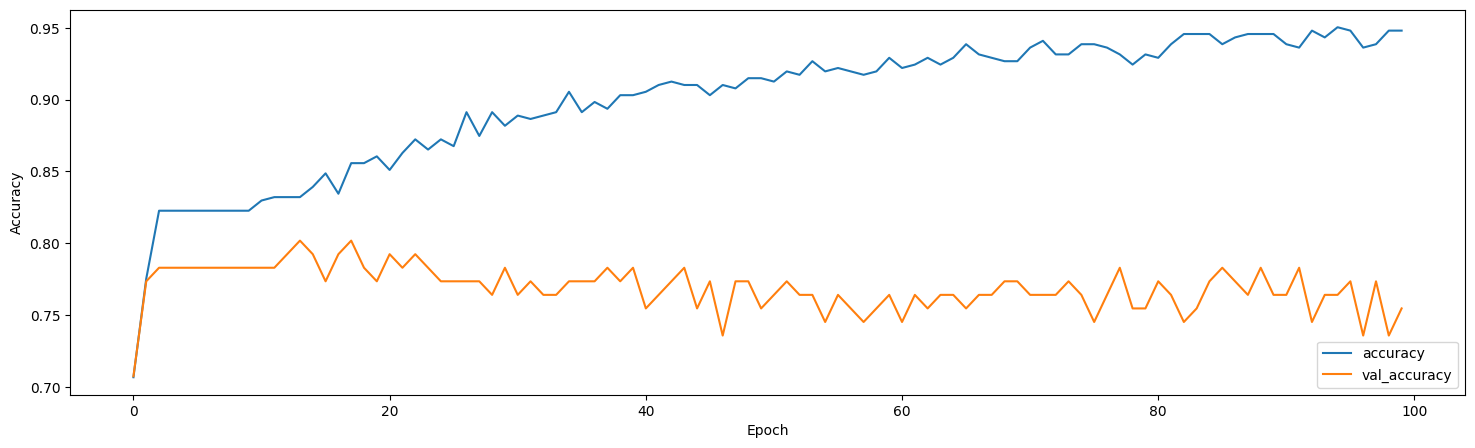

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# Load the preprocessed data
# data = ... (assume this is loaded as DataFrame 'data')

# Separate features and target variable
x = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=70)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Predict classes (binary)
y_pred_ann = (model.predict(x_test) > 0.5).astype("int32")

# Calculate F1 score
f1 = f1_score(y_test, y_pred_ann)
print('Test F1 Score:', f1)

# Generate classification report
report = classification_report(y_test, y_pred_ann, target_names=['Class 0', 'Class 1'])
print('Classification Report of ANN:\n', report)

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


Epoch 1/100
14/14 [==============================] - 1s 18ms/step - loss: 0.6185 - accuracy: 0.7092 - val_loss: 0.5917 - val_accuracy: 0.7075
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5283 - accuracy: 0.7872 - val_loss: 0.5472 - val_accuracy: 0.7830
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4838 - accuracy: 0.8251 - val_loss: 0.5405 - val_accuracy: 0.7830
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4573 - accuracy: 0.8274 - val_loss: 0.5370 - val_accuracy: 0.7830
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4439 - accuracy: 0.8251 - val_loss: 0.5368 - val_accuracy: 0.7830
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4325 - accuracy: 0.8274 - val_loss: 0.5517 - val_accuracy: 0.7736
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4251 - accuracy: 0.8227 - val_loss: 0.5468 - val_accuracy: 0.7830
Epoch 8/100


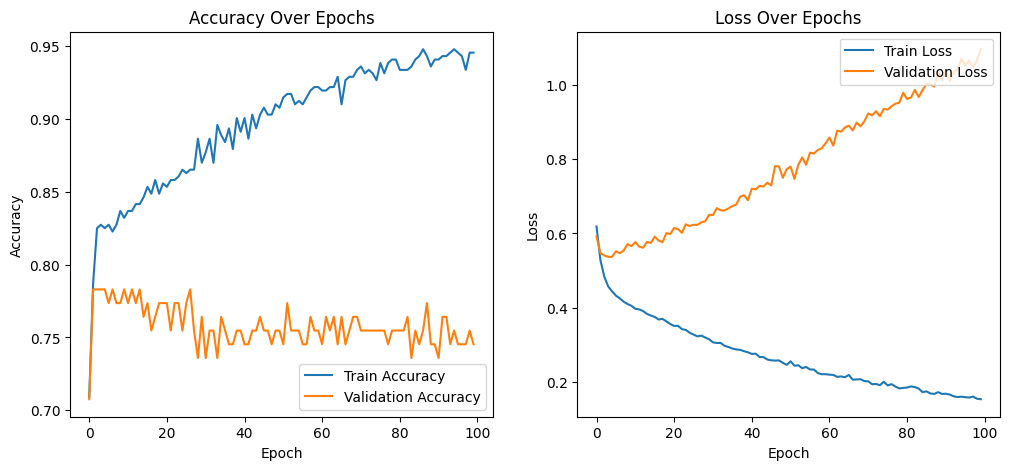

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# Load the preprocessed data
# data = ... (assume this is loaded as DataFrame 'data')

# Separate features and target variable
x = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=70)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Predict classes (binary)
y_pred_ann = (model.predict(x_test) > 0.5).astype("int32")

# Calculate F1 score
f1 = f1_score(y_test, y_pred_ann)
print('Test F1 Score:', f1)

# Generate classification report
report = classification_report(y_test, y_pred_ann, target_names=['Class 0', 'Class 1'])
print('Classification Report of ANN:\n', report)

# Visualize training history

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss Over Epochs')

plt.show()


In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,0.011401,0.592456,30.0,1,0,0
2,1,1,0,1,1,0.011400,0.458319,30.0,1,2,1
3,1,1,0,0,0,0.011401,0.578881,30.0,1,2,1
4,1,0,0,1,0,0.011401,0.613001,30.0,1,2,1
5,1,1,2,1,1,0.011402,0.754493,30.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,0.011400,0.472535,30.0,1,0,1
610,1,1,3,1,0,0.011400,0.364798,15.0,1,0,1
611,1,1,1,1,0,0.011402,0.742171,30.0,1,2,1
612,1,1,2,1,0,0.011402,0.674324,30.0,1,2,1


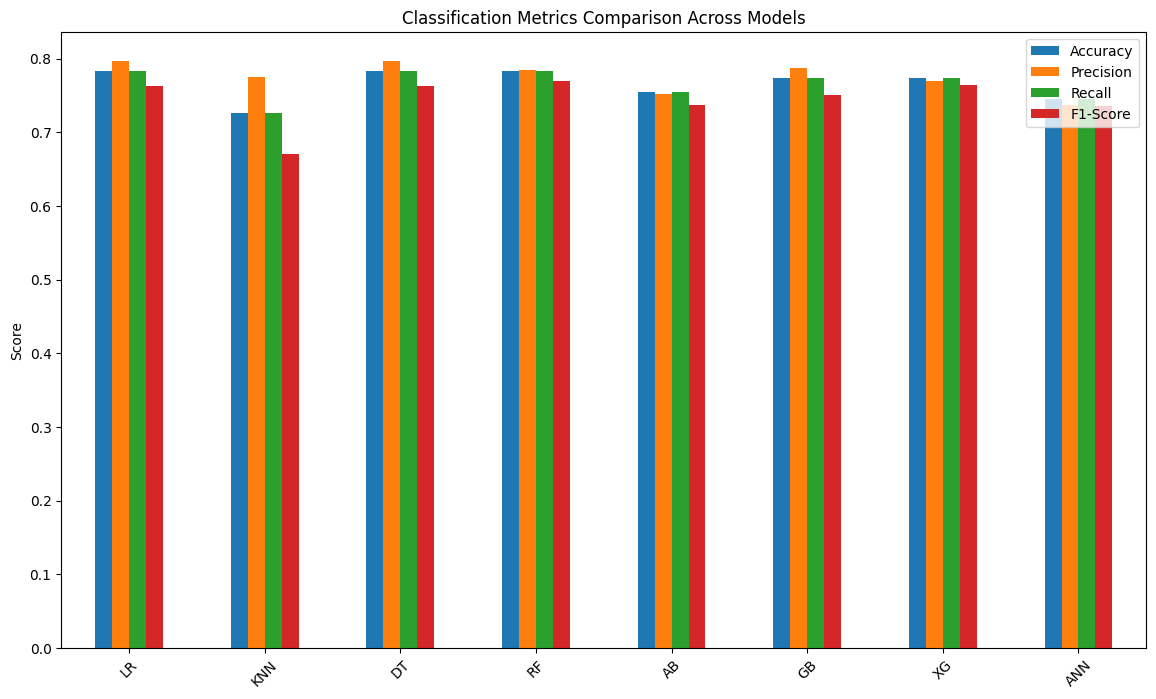

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Assuming y_pred variables for each model are defined (ypred_lr, ypred_knn, etc.)
# You need to replace these with your actual prediction variables from each model

# Generate classification reports
report_lr = classification_report(y_test, ypred_test, output_dict=True)
report_knn = classification_report(y_test, ypred_knn, output_dict=True)
report_dt = classification_report(y_test, ypred_dt, output_dict=True)
report_rf = classification_report(y_test, ypred_rf, output_dict=True)
report_ab = classification_report(y_test, ypred_ab, output_dict=True)
report_gb = classification_report(y_test, ypred_gb, output_dict=True)
report_xg = classification_report(y_test, ypred_xg, output_dict=True)
report_ann = classification_report(y_test, y_pred_ann, output_dict=True, target_names=['Class 0', 'Class 1'])  # Assuming y_pred_ann for ANN

# Create a DataFrame to hold metrics
models = ['LR', 'KNN', 'DT', 'RF', 'AB', 'GB', 'XG', 'ANN']
metrics_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=models)

# Populate the DataFrame
for idx, report in enumerate([report_lr, report_knn, report_dt, report_rf, report_ab, report_gb, report_xg, report_ann]):
    metrics_df.loc[models[idx], 'Accuracy'] = report['accuracy']
    metrics_df.loc[models[idx], 'Precision'] = report['weighted avg']['precision']
    metrics_df.loc[models[idx], 'Recall'] = report['weighted avg']['recall']
    metrics_df.loc[models[idx], 'F1-Score'] = report['weighted avg']['f1-score']

# Plotting
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Classification Metrics Comparison Across Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
# Remove grid lines
plt.grid(False)
plt.show()


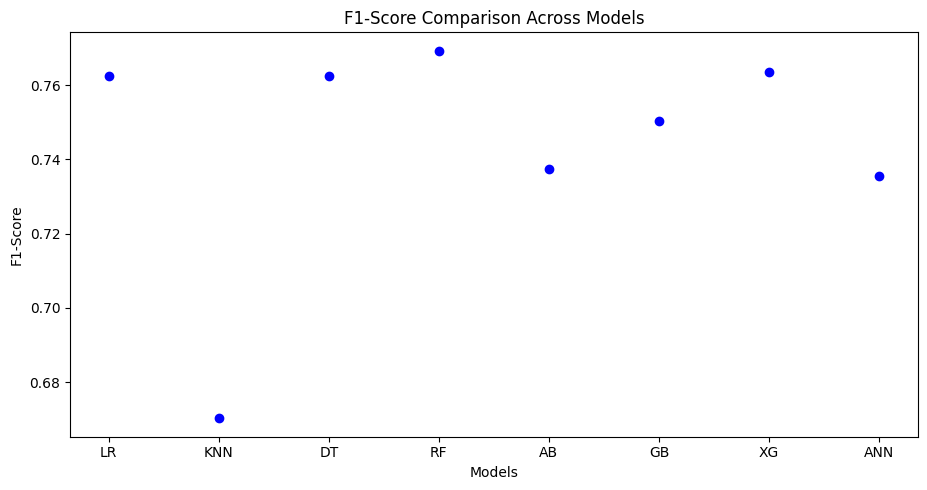

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Assuming y_pred variables for each model are defined (ypred_lr, ypred_knn, etc.)
# You need to replace these with your actual prediction variables from each model

# Generate classification reports
report_lr = classification_report(y_test, ypred_test, output_dict=True)
report_knn = classification_report(y_test, ypred_knn, output_dict=True)
report_dt = classification_report(y_test, ypred_dt, output_dict=True)
report_rf = classification_report(y_test, ypred_rf, output_dict=True)
report_ab = classification_report(y_test, ypred_ab, output_dict=True)
report_gb = classification_report(y_test, ypred_gb, output_dict=True)
report_xg = classification_report(y_test, ypred_xg, output_dict=True)
report_ann = classification_report(y_test, y_pred_ann, output_dict=True, target_names=['Class 0', 'Class 1'])  # Assuming y_pred_ann for ANN

# Create a DataFrame to hold metrics
models = ['LR', 'KNN', 'DT', 'RF', 'AB', 'GB', 'XG', 'ANN']
metrics_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=models)

# Populate the DataFrame
for idx, report in enumerate([report_lr, report_knn, report_dt, report_rf, report_ab, report_gb, report_xg, report_ann]):
    metrics_df.loc[models[idx], 'Accuracy'] = report['accuracy']
    metrics_df.loc[models[idx], 'Precision'] = report['weighted avg']['precision']
    metrics_df.loc[models[idx], 'Recall'] = report['weighted avg']['recall']
    metrics_df.loc[models[idx], 'F1-Score'] = report['weighted avg']['f1-score']

# Plotting scatter plot for F1-Score
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(models, metrics_df['F1-Score'], color='blue')
plt.title('F1-Score Comparison Across Models')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.grid(False)

plt.tight_layout()
plt.show()
